Coeff:  [[ 5.07793064]]
Intercept:  [ 25.21002155]
Score:  0.489872596175
Score:  0.878262470366


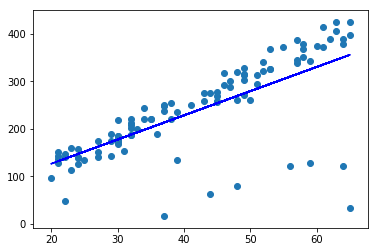

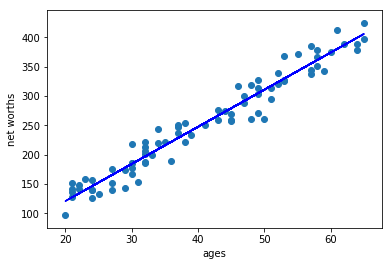

cleaned Coeff:  [[ 6.32006691]]
cleaned Intercept:  [-5.32173018]
cleaned Score:  0.413564421515
celaned Score:  0.982470051004


In [2]:
# %load outlier_removal_regression.py
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like

from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)
print "Coeff: ", reg.coef_
print "Intercept: ", reg.intercept_
print "Score: ", reg.score(ages_train, net_worths_train)
print "Score: ", reg.score(ages_test, net_worths_test)







try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"







### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()
    print "cleaned Coeff: ", reg.coef_
    print "cleaned Intercept: ", reg.intercept_
    print "cleaned Score: ", reg.score(ages_train, net_worths_train)
    print "celaned Score: ", reg.score(ages_test, net_worths_test)

else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"



METTS MARK {'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38} 

BAXTER JOHN C {'salary': 267102, 'to_messages': 'NaN', 'deferral_payments': 1295738, 'total_payments': 5634343, 'exercised_stock_options': 6680544, 'bonus': 1200000, 'restricted_stock': 3942714, 'shared_receipt_with_poi': 'NaN', 'restricted_stock_deferred': 'NaN', 'total_stock_value': 10623258, 'expenses': 11200, 'loan_advances': 'NaN', 'from_messages': 'NaN', 'other': 2660303, 'from_this_person_to_poi': 'NaN', 'poi': False, 'director_fee

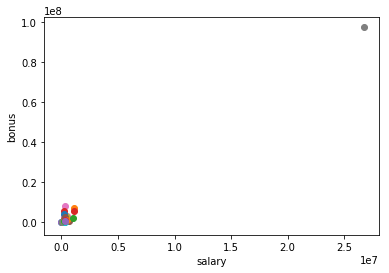

In [31]:
# %load enron_outliers.py
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot as pyp
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below
import math
max_bonus =0 
for person, k in data_dict.iteritems():
    if k['bonus'] > max_bonus and not math.isnan(float(k['bonus'])):
        max_bonus = k['bonus']
        print person, k, '\n'

# count = 0
# for point in data:
#     print count, point
#     count +=1

for point in data:
    salary = point[0]
    bonus = point[1]
    pyp.scatter(salary, bonus)

pyp.xlabel('salary')
pyp.ylabel('bonus')
pyp.show()



METTS MARK {'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38} 

BAXTER JOHN C {'salary': 267102, 'to_messages': 'NaN', 'deferral_payments': 1295738, 'total_payments': 5634343, 'exercised_stock_options': 6680544, 'bonus': 1200000, 'restricted_stock': 3942714, 'shared_receipt_with_poi': 'NaN', 'restricted_stock_deferred': 'NaN', 'total_stock_value': 10623258, 'expenses': 11200, 'loan_advances': 'NaN', 'from_messages': 'NaN', 'other': 2660303, 'from_this_person_to_poi': 'NaN', 'poi': False, 'director_fee

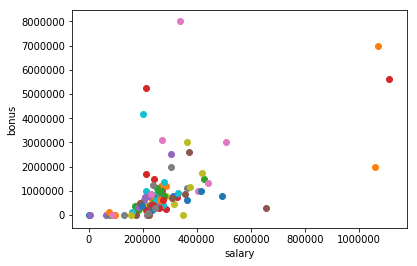

In [32]:
##################POP the total outlier, are there any more?

# %load enron_outliers.py
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot as pyp
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]

data_dict.pop("TOTAL",0)

data = featureFormat(data_dict, features)


### your code below
import math
max_bonus =0 
for person, k in data_dict.iteritems():
    if k['bonus'] > max_bonus and not math.isnan(float(k['bonus'])):
        max_bonus = k['bonus']
        print person, k, '\n'

# count = 0
# for point in data:
#     print count, point
#     count +=1

for point in data:
    salary = point[0]
    bonus = point[1]
    pyp.scatter(salary, bonus)

pyp.xlabel('salary')
pyp.ylabel('bonus')
pyp.show()

LAY KENNETH L {'salary': 1072321, 'to_messages': 4273, 'deferral_payments': 202911, 'total_payments': 103559793, 'exercised_stock_options': 34348384, 'bonus': 7000000, 'restricted_stock': 14761694, 'shared_receipt_with_poi': 2411, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 49110078, 'expenses': 99832, 'loan_advances': 81525000, 'from_messages': 36, 'other': 10359729, 'from_this_person_to_poi': 16, 'poi': True, 'director_fees': 'NaN', 'deferred_income': -300000, 'long_term_incentive': 3600000, 'email_address': 'kenneth.lay@enron.com', 'from_poi_to_this_person': 123} 

SKILLING JEFFREY K {'salary': 1111258, 'to_messages': 3627, 'deferral_payments': 'NaN', 'total_payments': 8682716, 'exercised_stock_options': 19250000, 'bonus': 5600000, 'restricted_stock': 6843672, 'shared_receipt_with_poi': 2042, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 26093672, 'expenses': 29336, 'loan_advances': 'NaN', 'from_messages': 108, 'other': 22122, 'from_this_person_to_poi': 30, '

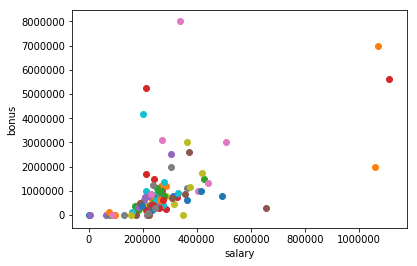

In [37]:
##################POP the total outlier, are there any more?

# %load enron_outliers.py
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot as pyp
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]

data_dict.pop("TOTAL",0)

data = featureFormat(data_dict, features)


### your code below
import math
max_bonus =0 
for person, k in data_dict.iteritems():
    if k['bonus'] > 5000000 and not math.isnan(float(k['bonus'])) and k['salary']>1000000:
        #max_bonus = k['bonus']
        print person, k, '\n'

# count = 0
# for point in data:
#     print count, point
#     count +=1

for point in data:
    salary = point[0]
    bonus = point[1]
    pyp.scatter(salary, bonus)

pyp.xlabel('salary')
pyp.ylabel('bonus')
pyp.show()